In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import csv
import xlrd
import os
import os.path
from pathlib2 import Path
from decimal import *
%matplotlib inline
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [2]:
indir = '/gpfs/amarolab/monolayers/carter_mixed_exp_data/'
def extractDataFromXLSX(infile):
    data = xlrd.open_workbook(infile).sheet_by_index(0)
    xvals = []
    yvals = []
    evals = []
    try:
        for i in range(2,2000):
            xvals.append(data.cell(i,0).value)
            yvals.append(data.cell(i,1).value)
            evals.append(data.cell(i,2).value)
    except IndexError: 
        #print('end')
        pass
    q = np.array([xvals, yvals, evals])
    return(q)

datdict = {}
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        h = f.replace(' ', '_')
        #print(g)
        datdict[h] = extractDataFromXLSX(indir+f)
        #dat2_matrix.append(extractDataFromXLSX(indir+f))
print(datdict)

{'3Mix_0.4_M_NaCl_pH_8.2.xlsx': array([[ 1.204000e+01,  1.206287e+01,  1.208575e+01, ...,  3.484425e+01,
         3.486713e+01,  3.489000e+01],
       [ 6.966761e+01,  6.960410e+01,  6.953973e+01, ..., -9.780000e-03,
        -9.650000e-03, -8.900000e-03],
       [ 2.073060e+00,  2.119060e+00,  2.167890e+00, ...,  1.549000e-02,
         1.533000e-02,  1.431000e-02]]), '4Mix-LA_0.4_M_NaCl_pH_8.2.xlsx': array([[ 7.92   ,  7.96323,  8.00647, ..., 51.02353, 51.06677, 51.11   ],
       [77.64879, 77.16757, 76.78858, ..., -0.93546, -0.93804, -0.93945],
       [ 6.83627,  6.65088,  6.37161, ...,  1.54737,  1.55064,  1.55471]]), '3Mix_0.4_M_NaCl_pH_5.6.xlsx': array([[ 1.206000e+01,  1.208663e+01,  1.211325e+01, ...,  3.860675e+01,
         3.863337e+01,  3.866000e+01],
       [ 6.403513e+01,  6.403157e+01,  6.402800e+01, ..., -4.766000e-02,
        -4.878000e-02, -4.990000e-02],
       [ 2.947470e+00,  2.959230e+00,  2.971030e+00, ...,  4.257000e-02,
         4.366000e-02,  4.567000e-02]]), '4M

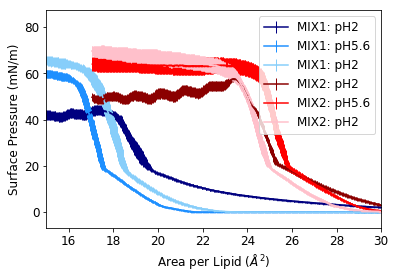

In [25]:
#plt.figure(figsize=(8,6))
#plt.subplots(1, 2, sharey=True)
plt.errorbar(datdict['4Mix_0.4_M_NaCl_pH_2.xlsx'][0], datdict['4Mix_0.4_M_NaCl_pH_2.xlsx'][1], yerr=datdict['4Mix_0.4_M_NaCl_pH_2.xlsx'][2],ecolor='navy', elinewidth=1,  marker='.', ms=1, c='navy', label='MIX1: pH2')
plt.errorbar(datdict['4Mix_0.4_M_NaCl_pH_5.6.xlsx'][0], datdict['4Mix_0.4_M_NaCl_pH_5.6.xlsx'][1], yerr=datdict['4Mix_0.4_M_NaCl_pH_5.6.xlsx'][2],ecolor='dodgerblue', elinewidth=1,  marker='.', ms=1, c='dodgerblue', label='MIX1: pH5.6')
plt.errorbar(datdict['4Mix_0.4_M_NaCl_pH_8.2.xlsx'][0], datdict['4Mix_0.4_M_NaCl_pH_8.2.xlsx'][1], yerr=datdict['4Mix_0.4_M_NaCl_pH_8.2.xlsx'][2],ecolor='lightskyblue', elinewidth=1,  marker='.', ms=1, c='lightskyblue', label='MIX1: pH2')
plt.errorbar(datdict['3Mix_0.4_M_NaCl_pH_2.xlsx'][0]+5, datdict['3Mix_0.4_M_NaCl_pH_2.xlsx'][1], yerr=datdict['3Mix_0.4_M_NaCl_pH_2.xlsx'][2],ecolor='darkred', elinewidth=1,  marker='.', ms=1, c='darkred', label='MIX2: pH2')
plt.errorbar(datdict['3Mix_0.4_M_NaCl_pH_5.6.xlsx'][0]+5, datdict['3Mix_0.4_M_NaCl_pH_5.6.xlsx'][1], yerr=datdict['3Mix_0.4_M_NaCl_pH_5.6.xlsx'][2],ecolor='red', elinewidth=1,  marker='.', ms=1, c='red', label='MIX2: pH5.6')
plt.errorbar(datdict['3Mix_0.4_M_NaCl_pH_8.2.xlsx'][0]+5, datdict['3Mix_0.4_M_NaCl_pH_8.2.xlsx'][1], yerr=datdict['3Mix_0.4_M_NaCl_pH_8.2.xlsx'][2],ecolor='pink', elinewidth=1,  marker='.', ms=1, c='pink', label='MIX2: pH2')
plt.xlim(15, 30)
plt.legend(loc=1)
plt.xlabel('Area per Lipid ($\AA^2$)')
plt.ylabel('Surface Pressure (mN/m)')
plt.savefig('/home/adommer/Desktop/experimental_pH_isotherms.png', dpi=300)